<a href="https://colab.research.google.com/github/kabta/Webscraping-/blob/main/WebScrapping_Beautifulsoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing of libraries

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



Creating dataframe
---



In [ ]:
df= pd.DataFrame(columns=['Name','Address','Distance from city center','Price','Review','Rating', 'Summary', 'Images'])
df

,Name,Address,Distance from city center,Price,Review,Rating,Summary,Images


Scraping on Booking.com

In [ ]:
#scraping on booking.com
booking_link = 'https://www.booking.com/searchresults.html?ss=Tokyo&ssne=Tokyo&ssne_untouched=Tokyo&label=gen173nr-1DCAEoggI46AdIM1gEaEiIAQGYATG4AQfIAQzYAQPoAQH4AQKIAgGoAgO4Ao2QvZkGwAIB0gIkMGU1MDVkMzktNzRmYy00YWJhLWJhYTYtMGI5MzU5ODMyMDBm2AIE4AIB&sid=44fe77592d29ea2869c2c74ad3845e91&aid=304142&lang=en-us&sb=1&src_elem=sb&src=searchresults&dest_id=-246227&dest_type=city&checkin=2022-09-29&checkout=2022-09-30&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure'
source_booking = requests.get(booking_link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",
    }).text
soup_booking = BeautifulSoup(source_booking,'lxml')

for Post in soup_booking.find_all('div', attrs={"data-testid":"property-card"}):
  b_name = Post.h3.text
  b_name= b_name.replace('Opens in new window', '')
  #print(b_name)
  b_hotel_fulllink= Post.find('a')['href']
  #print(hotel_fulllink)
  try:
    b_distance = Post.find('span', attrs={"data-testid":"distance"})
    b_dist= str(b_distance)
    b_dist= b_dist.replace('<span aria-expanded="false" data-testid="distance">', '')
    b_dist= b_dist.replace('miles from center</span>', '')
    #print(dist)
  except:
    b_distance=''
    #print(distance)
  try:
    price_full = Post.find('span', class_='bd73d13072')
    b_price= str(price_full)
    b_price= b_price.replace('<span class="fcab3ed991 bd73d13072">$', '')
    b_price= b_price.replace('</span>', '')
   # print(price)
  except:
    print("inside price except")
    b_price=''
    #print(b_price)
  try:
    b_review_full = Post.find('div', class_='d10a6220b4').text
   # print(b_review_full)
  except:
    b_review=''
    #print(b_review)
  try:
    b_rating_full = Post.find('div', class_='f919b8b3d5')
    b_rating= str(b_rating_full)
    #print(b_rating)
  except:
    b_rating=''
    #print(b_rating)
  b_source_eachhotel = requests.get(b_hotel_fulllink, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",}).text
  b_soup_hotel = BeautifulSoup(b_source_eachhotel,'lxml')
  address_full=b_soup_hotel.find('p', class_='address address_clean').text
  b_address_str=str(address_full)
  b_address = b_address_str.replace("\n", "")
  b_address = b_address.split("–")[0]
  b_address.strip()
  #print(b_address)
  b_description_full= b_soup_hotel.find('div', attrs={"id":"property_description_content"}).text
  #print(b_description_full)
  b_image_link_full = b_soup_hotel.find_all('div', class_='bh-photo-grid-thumb-cell')
  for items in b_image_link_full:
    b_image= items.a["style"]
    b_image= b_image.replace("background-image: url(","")
    b_image= b_image.replace(");","")
    #print(b_image)
    #print('')


  
  new_row ={'Name':b_name,'Address':b_address, 'Distance from city center':b_dist, 'Price':b_price, 'Review':b_review_full,'Rating':b_rating,'Summary':b_description_full ,'Images':b_image}
  df = df.append(new_row,ignore_index = True)
df
  #df['Distance form hotel'] = pd.to_numeric(df['Distance form hotel'])
  #df['Review'] = pd.to_numeric(df['Review'])
  #df['Rating'] = pd.to_numeric(df['Rating'])
  #df['Price'] = pd.to_numeric(df['Price'])

,Name,Address,Distance from city center,Price,Review,Rating,Summary,Images
0,Hotel Risveglio Akasaka,"107-0052 Tokyo-to, Minato-ku, Akasaka 3-18-1, ...",0.8,48,8.6,,"\nOpen from December 2015, Hotel Risveglio Aka...",https://cf.bstatic.com/xdata/images/hotel/max3...
1,the b akasaka-mitsuke,"107-0052 Tokyo-to, Minato-ku, Akasaka 3-21-7 ,...",0.7,52,8.1,,\nJust a 2-minute walk from Akasaka-Mitsuke Su...,https://cf.bstatic.com/xdata/images/hotel/max3...
2,Sunshine City Prince Hotel Ikebukuro,"170-8440 Tokyo-to, Toshima-ku, Higashiikebukur...",3.1,57,8.3,,\nThe stylish Sunshine City Prince Hotel featu...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
3,Toyoko Inn Tokyo Shinjuku gyoemmae eki 3 ban D...,"160-0022 Tokyo-to, Shinjyuku-ku Shinjuku 1-17-...",1.1,58,7.7,,"\nIn a prime location in the centre of Tokyo, ...",https://t-cf.bstatic.com/xdata/images/hotel/ma...
4,Sotetsu Fresa Inn Daimon - Open from 26 Januar...,"105-0012 Tokyo-to, Minato-ku Shiba Daimon 2-6-...",2.5,57,8.4,,\nOffering air-conditioned rooms in the Minato...,https://cf.bstatic.com/xdata/images/hotel/max3...
5,The Royal Park Hotel Tokyo Haneda,"144-0041 Tokyo-to, Ota-ku Haneda Airport 2-6-5...",9.9,119,8.4,,\nWith its lobby located next to the departure...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
6,Toyoko Inn Tokyo Akabane-eki Higashi-guchi,"115-0045 Tokyo-to, Kita-ku Akabane 1-11-11, Japan",6.5,48,7.9,,\nConveniently located in the Kita district of...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
7,hotel MONday Premium Ueno Okachimachi,"110-0016 Tokyo-to, Taito-ku, Taito 3-41-7, Japan",2.9,54,8.5,,\nAttractively situated in the Taito district ...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
8,Ours Inn Hankyu,"140-0014 Tokyo-to, Shinagawa-ku Oi 1-50-5, Japan",5.6,44,7.9,,\nOurs Inn Hankyu is situated in the Shinagawa...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
9,Richmond Hotel Asakusa,"111-0032 Tokyo-to, Taito-ku, Asakusa 2-7-10, J...",4.1,42,8.5,,"\nOpened in March 2012, Richmond Hotel Asakusa...",https://cf.bstatic.com/xdata/images/hotel/max3...


Scraping on eDreams.com

In [ ]:
#scraping on eDreams.com
eDreams_link ='https://hotels.edreams.com/searchresults.html?label=edr-link-com-sb-conf-pc-of&utm_source=google&utm_medium=organic&utm_term=edreams&utm_campaign=%28organic%29&aid=350435&checkin=2022-09-29&checkout=2022-09-30&fp_referrer_aid=308918&group_adults=1&group_children=0&lang=en-gb&no_rooms=1&selected_currency=EUR&si=ai%2Cco%2Cci%2Cre%2Cdi&sp_plprd=UmFuZG9tSVYkc2RlIyh9YVXcKaaJl1ClZT4Q5qoh9idgSyk5VE-0YHC1hiZOzP_87jIuRn-YvcVo5554wuQxjBASKqS1kXqyaIVEw3PNEEerfYnTf8UhF5K5NlzpnfR6DI4NvAVrqBela-Y45zgakg&ss=Tokyo&submit=Search+hotels&offset=75'
source_eDreams = requests.get(eDreams_link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",
    }).text
soup_eDreams = BeautifulSoup(source_eDreams,'lxml')

for Post in soup_eDreams.find_all('div', attrs={"data-testid":"property-card"}):
  ed_name = Post.h3.text
  ed_name= ed_name.replace('Opens in new window', '')
  print(ed_name)
  ed_hotel_fulllink= Post.find('a')['href']
  print(ed_hotel_fulllink)
  try:
    ed_distance = Post.find('span', attrs={"data-testid":"distance"})
    ed_dist= str(ed_distance)
    ed_dist= ed_dist.replace('<span aria-expanded="false" data-testid="distance">', '')
    ed_dist= ed_dist.replace('miles from centre</span>', '')
    print(ed_dist)
  except:
    ed_distance=''
    print(ed_distance)
  try:
    price_full = Post.find('span', class_='bd73d13072')
    ed_price= str(price_full)
    ed_price= ed_price.replace('<span class="fcab3ed991 bd73d13072">US$', '')
    ed_price= ed_price.replace('</span>', '')
    print(ed_price)
  except:
    print("inside price except")
    ed_price=''
    print(ed_price)
  try:
    ed_review_full = Post.find('div', class_='d10a6220b4').text
    print(ed_review_full)
  except:
    ed_review=''
    print(ed_review)
  try:
    ed_rating_full = Post.find('div', class_='f919b8b3d5')
    ed_rating= str(b_rating_full)
    print(ed_rating)
  except:
    ed_rating=''
    print(ed_rating)
  ed_source_eachhotel = requests.get(ed_hotel_fulllink, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",}).text
  ed_soup_hotel = BeautifulSoup(ed_source_eachhotel,'lxml')
  address=ed_soup_hotel.find('p', class_='address address_clean').text
  ed_address_str=str(address)
  ed_address = ed_address_str.replace("\n", "")
  ed_address = ed_address.split("–")[0]
  ed_address.strip()
  print(ed_address)
  ed_description= ed_soup_hotel.find('div', attrs={"id":"property_description_content"}).text
  print(ed_description)
  ed_image_link_full = ed_soup_hotel.find_all('div', class_='bh-photo-grid-thumb-cell')
  for items in ed_image_link_full:
    ed_image= items.a["style"]
    ed_image= ed_image.replace("background-image: url(","")
    ed_image= ed_image.replace(");","")
    print(ed_image)
    print('')


  
  new_row ={'Name':ed_name,'Address':ed_address, 'Distance from city center':ed_dist, 'Price':ed_price, 'Review':ed_review_full,'Rating':ed_rating,'Summary':ed_description ,'Images':ed_image}
  df = df.append(new_row,ignore_index = True)
df
    #df['Distance form hotel'] = pd.to_numeric(df['Distance form hotel'])
    #df['Review'] = pd.to_numeric(df['Review'])
    #df['Rating'] = pd.to_numeric(df['Rating'])
    #df['Price'] = pd.to_numeric(df['Price'])

nine hours Akasaka sleep lab
https://hotels.edreams.com/hotel/jp/nine-hours-akasaka.en-gb.html?label=edr-link-com-sb-conf-pc-of&sid=36f9f8039b06d63b7190f49c2e73d336&utm_source=google&utm_medium=organic&utm_term=edreams&utm_campaign=%28organic%29&aid=350435&ucfs=1&arphpl=1&checkin=2022-09-29&checkout=2022-09-30&group_adults=1&req_adults=1&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=76&sr_order=popularity&srpvid=979660d704f8005e&srepoch=1664113584&all_sr_blocks=306801006_251215164_0_0_0&highlighted_blocks=306801006_251215164_0_0_0&matching_block_id=306801006_251215164_0_0_0&sr_pri_blocks=306801006_251215164_0_0_0__405000&dcs_click=1&from=searchresults#hotelTmpl
0.9 
28
8.1
None
107-0052 Tokyo-to, Minato-ku Akasaka 4-3-14, Japan

Offering air-conditioned rooms in the Minato district of Tokyo, nine hours Akasaka sleep lab is 1,650 feet from Akasaka Station. Among the facilities at this property are a 24-hour front desk and luggage storage space, along with free WiFi throughout 

,Name,Address,Distance from city center,Price,Review,Rating,Summary,Images
0,Hotel Risveglio Akasaka,"107-0052 Tokyo-to, Minato-ku, Akasaka 3-18-1, ...",0.8,48,8.6,,"\nOpen from December 2015, Hotel Risveglio Aka...",https://cf.bstatic.com/xdata/images/hotel/max3...
1,the b akasaka-mitsuke,"107-0052 Tokyo-to, Minato-ku, Akasaka 3-21-7 ,...",0.7,52,8.1,,\nJust a 2-minute walk from Akasaka-Mitsuke Su...,https://cf.bstatic.com/xdata/images/hotel/max3...
2,Sunshine City Prince Hotel Ikebukuro,"170-8440 Tokyo-to, Toshima-ku, Higashiikebukur...",3.1,57,8.3,,\nThe stylish Sunshine City Prince Hotel featu...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
3,Toyoko Inn Tokyo Shinjuku gyoemmae eki 3 ban D...,"160-0022 Tokyo-to, Shinjyuku-ku Shinjuku 1-17-...",1.1,58,7.7,,"\nIn a prime location in the centre of Tokyo, ...",https://t-cf.bstatic.com/xdata/images/hotel/ma...
4,Sotetsu Fresa Inn Daimon - Open from 26 Januar...,"105-0012 Tokyo-to, Minato-ku Shiba Daimon 2-6-...",2.5,57,8.4,,\nOffering air-conditioned rooms in the Minato...,https://cf.bstatic.com/xdata/images/hotel/max3...
...,...,...,...,...,...,...,...,...
70,Bay Hotel Tokyo Hamamatsucho,"105-0013 Tokyo-to, Minato-ku Hamamatsucho 1-16...",2.5,29,8.2,None,\nBay Hotel Tokyo Hamamatsucho in Tokyo provid...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
71,APA Hotel Ningyocho-eki Kita,"103-0012 Tokyo-to, Chuo-ku Nihonbashi Horidome...",2.9,35,7.6,None,\nAPA Hotel Ningyocho-eki Kita is a 2-minute w...,https://cf.bstatic.com/xdata/images/hotel/max3...
72,Hotel Monterey Ginza,"104-0061 Tokyo-to, Chuo-ku Ginza 2-10-2 , Japan",2.4,73,8.2,None,\nHotel Monterey Ginza is a 1-minute walk from...,https://t-cf.bstatic.com/xdata/images/hotel/ma...
73,Richmond Hotel Tokyo Shiba,"105-0011 Tokyo-to, Minato-ku, Shibakouen 2-3-4...",2.4,68,8.4,None,\nSituated a 6-minute walk from JR Hamamatsuch...,https://cf.bstatic.com/xdata/images/hotel/max3...


Scraping on LetsBookHotel.com

In [ ]:
#scraping on letsbook.com
letsbook_link ='https://www.letsbookhotel.com/sv/japan/tokyo/hotels-accommodation.aspx'
source_letsbook = requests.get(letsbook_link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",
    }).text
soup_letsbook= BeautifulSoup(source_letsbook,'lxml')

for Post in soup_letsbook.find_all('li', class_="hotelitem"):
    try:
      l_name = Post.find('a',class_="clickable").text
     # print(l_name) 
    except:
      l_name=''

    try:
      l_dist = Post.find('div',class_="hoteltitle").text
      l_dist= str(l_dist)
      l_dist = l_dist.replace("\n","")
      l_dist = l_dist.replace("Km > Tokyo","")
      l_dist = l_dist.replace(l_name,"")
     # print(l_dist) 

    except:
      l_dist=''
     
    try:

      l_rating= Post.find('img')['alt']
      l_rating= str(l_rating)
      l_rating = l_rating.replace("stars","")
      #print(l_rating) 
    except:
      l_rating=''
      
    try:
      l_address= Post.find('span', class_="text icon-text icon-distance").text
      l_address = str(l_address)
      l_address= l_address.replace("map","")
      l_address = l_address.replace("                                    karta","" )
      #print(l_address)
    except:
      l_address=""
    
    try:
      l_description= Post.find('div', class_="info").text
      l_description= l_description.strip()
      l_description= l_description.replace("  ","")
      l_description= l_description.replace("/n","")
     # print(l_description)
    except:
      l_description=''

    try:
      l_price = Post.find('div', class_="price").text
      l_price = str(price_full)
      l_price= l_price.strip()
      l_price=l_price.replace("/n","")
      l_price=l_price.replace('<span class="fcab3ed991 bd73d13072">US$',"")
      l_price = l_price.replace("</span>","")
      #print(l_price)
      
    except:
      l_price=""

    try:
      l_review = Post.find('div', class_="reviews").text
      l_review= str(l_review)
      l_review.strip()
      l_review=l_review.replace(" ","")
      l_review=l_review.split(".")[0]
      l_review_score = ""
      for x in l_review:
        if x.isdigit():
          l_review_score = l_review_score + x
      #print("review")
      #print(l_review_score)

    except:
      #print("ereview")

      l_review =''

    try:
      l_hotel_link = Post.find('a')['href']
      l_hotel_link = str(l_hotel_link)
      l_hotel_link = "https://www.letsbookhotel.com" + l_hotel_link
      #print(l_hotel_link)
      l_source_hotellink = requests.get(l_hotel_link, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36",}).text
      l_soup_hotellink = BeautifulSoup(l_source_hotellink, 'lxml')
      #print(l_source_hotellink)
      #l_description= l_source_hotellink.find('div', attrs={"id":"hotelinfo"}).text
      #l_description = l_description.replace("/n", "")
      #print(l_description)

      l_image=l_soup_hotellink.find("img", id="contentdisplaypic")["src"]
      l_image=str(l_image)
      l_image= "https://www.letsbookhotel.com" +imagess
     # print(l_image)
      

      #l_image_link_full = l_soup_hotellink.find_all('div', class_='fotorama')
      
      #for x in l_image_link_full:
        #l_image= l_image_link_full.find('img')['src']
        #l_image= l_image.replace("background-image: url(","")
        #l_image= l_image.replace(");","")
       # print(l_image)
        #print('')


      #imagess=l_source_hotellink.find("img", id="contentdisplaypic")["src"]
      #imagess=str(imagess)
      #imagess= "https://www.letsbookhotel.com" +imagess

      #print(imagess)
      #for ele in soup_hotel_lets.find_all('div', class_="fotorama__nav fotorama__nav--thumbs fotorama__shadows--right"):
        #img=ele.find('img')['src']
        #print(ele)
      #print(images_li)
      #print(soup_hotel_lets)
    except:
      images=''


    new_row = {'Name':l_name, 'Address':l_address, 'Distance from city center':l_dist, 'Price':l_price,'Review':l_review_score,'Rating':l_rating,'Summary':l_description,'Images':l_image}
    df = df.append(new_row, ignore_index=True)
df
#df.to_csv('file_name6.csv')

df['Distance from city center'] = pd.to_numeric(df['Distance from city center'])
df['Review'] = pd.to_numeric(df['Review'])
#df['Rating'] = pd.to_numeric(df['Rating'])
df['Price'] = pd.to_numeric(df['Price'])



    






Storing data into csv: Hotels.csv

In [ ]:
df.to_csv('Hotels.csv')


Visualization and Analysis using Pie-chart

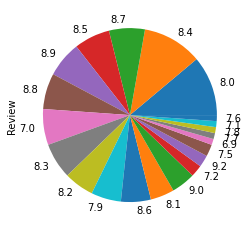

In [ ]:
#calculate the percentage of each review category.
df.Review.value_counts(normalize=True)

#plot the pie chart of review categories
df.Review.value_counts(normalize=True).plot.pie()
plt.show()

Analysis using Scatterplot diagram

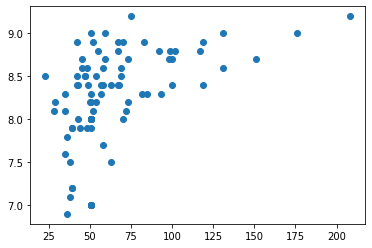

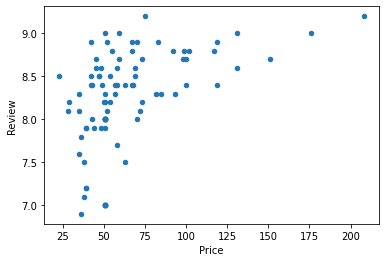

In [ ]:
#plot the scatter plot of price and review variable in data
plt.scatter(df.Price ,df.Review)
plt.show()

#plot the scatter plot of price and review variable in data
df.plot.scatter(x="Price",y="Review")
plt.show()

EDA using pairplot of distance, review and price in dataframe

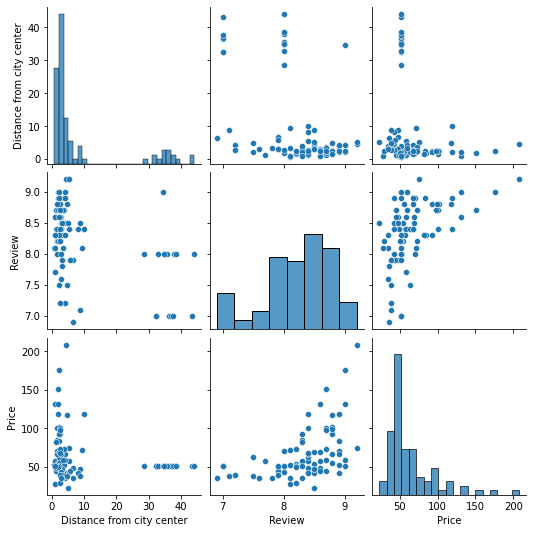

In [ ]:
#plot the pair plot of distance, review and price in  dataframe.
sns.pairplot(data = df, vars=['Distance from city center','Review','Price'])
plt.show()

User interation and output for user

In [ ]:

#User Interaction

#according to price
print('Choose price range for hotel from below')
print('a : 10 Dollars or below')
print('b : 10 Dollars - 25 Dollars')
print('c : 25 Dollars - 50 Dollars')
print('d : 50 Dollars - 75 Dollars ')
print('d : 75 Dollars - 100 Dollars')

uchoise_price = input('Your Choice =')

if uchoise_price == 'a':
  ch_price1 = 0
  ch_price2 = 100
  print(ch_price1, ch_price2)

elif uchoise_price == 'b':
  ch_price1 = 100
  ch_price2 = 200
  print(ch_price1, ch_price2)

elif uchoise_price == 'c':
  ch_price1 = 200
  ch_price2 = 300
  print(ch_price1, ch_price2)

elif uchoise_price == 'd':
  ch_price1 = 300
  ch_price2 = 400
  print(ch_price1, ch_price2)

elif uchoise_price == 'e':
  ch_price1 = 400
  ch_price2 = 500
  print(ch_price1, ch_price2)

else:
  print('You selected wrong option')

print('Choose distance range for hotel from below')
print('a : 1 miles')
print('b : 1 miles - 2 miles ')
print('c : 2 miles - 3 miles ')
print('d : 3 miles - 4 miles ')
print('e : 4 miles - 5 miles ')

uchoise_dist = input('Your Choice =')

if uchoise_dist == 'a':
  ch_dist1 = 0
  ch_dist2 = 1
  print(ch_dist1,',', ch_dist2)

elif uchoise_dist == 'b':
  ch_dist1 = 1
  ch_dist2 = 2
  print(ch_dist1,',', ch_dist2)

elif uchoise_dist == 'c':
  ch_dist1 = 2
  ch_dist2 = 3
  print(ch_dist1,',', ch_dist2)

elif uchoise_dist == 'd':
  ch_dist1 = 3
  ch_dist2 = 4
  print(ch_dist1,',', ch_dist2)

elif uchoise_dist == 'e':
  ch_dist1 = 4
  ch_dist2 = 5
  print(ch_dist1,',', ch_dist2)

else:
  print('You selected wrong option')


#according to hotel review score
print('Choose review range for hotel from below')
print('a : 8  or below')
print('b : 8 - 8.5')
print('c : 8.5 - 9')
print('d : 9 - 9.5')
print('e : 9.5 - 10')

uchoise_review = input('Your Choice =')

if uchoise_review == 'a':
  ch_review1 = 0
  ch_review2 = 8
  print(ch_review1,',', ch_review2)

elif uchoise_review == 'b':
  ch_review1 = 8
  ch_review2 = 8.5
  print(ch_review1,',', ch_review2)

elif uchoise_review == 'c':
  ch_review1 = 8.5
  ch_review2 = 9
  print(ch_review1,',', ch_review2)

elif uchoise_review == 'd':
  ch_review1 = 9
  ch_review2 = 9.5
  print(ch_review1,',', ch_review2)

elif uchoise_review == 'e':
  ch_review1 = 9.5
  ch_review2 = 10
  print(ch_review1,',', ch_review2)

else:
  print('You selected wrong option')





#sorting 
print('Choose criteria by which you want to sort the data')
print('A : Distance from the city center')
print('B : Price')
print('C : Hotel Review Score')

uchoise_sort = input('Sorting choice =')

if uchoise_sort == 'A':
  sort_input ='Distance from city center'
  print(sort_input)

elif uchoise_sort == 'B':
  sort_input ='Price'
  print(sort_input)

elif uchoise_sort == 'C':
  sort_input ='Review'
  print(sort_input)



else:
  print('You selected wrong option')

print('      List of Hotels Names')
#df_sorted= pd.DataFrame(columns=['Name','Hotels_Address','Distance from city center','Price','Review','Rating','Hotel_Summary','Photos'])

#df_sorted = df.loc[(df['Distance from city center']> ch_dist1) & (df['Distance from city center']<=ch_dist2) & (df['Price'] >ch_price1) & (df['Price'] <=ch_price2) & (df['Review']>ch_review1) & (df['Review']<=ch_review2)]
#df_sorted = df

#df_new2= pd.DataFrame(columns=['Name','Hotels_Address','Distance_from_city_center','Price','Review_Score','Hotel_Rating','Hotel_Summary','Photos'])
df_sorted = df.loc[(df['Distance from city center']> ch_dist1) & (df['Distance from city center']<=ch_dist2) & (df['Price'] >ch_price1) & (df['Price'] <=ch_price2) & (df['Review']>ch_review1) & (df['Review']<=ch_review2)]
df_sorted.sort_values(by=[sort_input])


print(df_sorted['Name'])
print("")
print("")


print('Choose the name of the hotel from the list')
print('Type it exactly as it is')
name_input = input('Name of hotel =')
print("")
print("")


print('   Details of Hotels ')
print("")


#df_latest=df_new2.where(df_new2['Name'] == name_input)
df_latest= df_sorted.loc[(df_sorted['Name'] == name_input)]
print(df_latest)
#df_latest.to_csv('final_result.csv')

#print(df['Comedy_Score'].where(df['Rating_Score'] < 50))




Choose price range for hotel from below
a : 10 Dollars or below
b : 10 Dollars - 25 Dollars
c : 25 Dollars - 50 Dollars
d : 50 Dollars - 75 Dollars 
d : 75 Dollars - 100 Dollars
Your Choice =d
300 400
Choose distance range for hotel from below
a : 1 miles
b : 1 miles - 2 miles 
c : 2 miles - 3 miles 
d : 3 miles - 4 miles 
e : 4 miles - 5 miles 
Your Choice =a
0 , 1
Choose review range for hotel from below
a : 8  or below
b : 8 - 8.5
c : 8.5 - 9
d : 9 - 9.5
e : 9.5 - 10
Your Choice =c
8.5 , 9
Choose criteria by which you want to sort the data
A : Distance from the city center
B : Price
C : Hotel Review Score
Sorting choice =B
Price
      List of Hotels Names
Series([], Name: Name, dtype: object)


Choose the name of the hotel from the list
Type it exactly as it is
Name of hotel =


   Details of Hotels 

Empty DataFrame
Columns: [Name, Address, Distance from city center, Price, Review, Rating, Summary, Images]
Index: []


In [ ]:
df_sorted





,Name,Address,Distance from city center,Price,Review,Rating,Summary,Images


                                                     *****Happy Learning*****